<a href="https://colab.research.google.com/github/kaya1995/IA/blob/master/Aissatou_Faye_CIFAR_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Train your first neural network: Basic classification

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://www.tensorflow.org/beta/tutorials/keras/basic_classification"><img src="https://www.tensorflow.org/images/tf_logo_32px.png" />View on TensorFlow.org</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/r2/tutorials/keras/basic_classification.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/tensorflow/docs/blob/master/site/en/r2/tutorials/keras/basic_classification.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
  <td>
    <a href="https://storage.googleapis.com/tensorflow_docs/site/en/r2/tutorials/keras/basic_classification.ipynb"><img src="https://www.tensorflow.org/images/download_logo_32px.png" />Download notebook</a>
  </td>
</table>

This guide trains a neural network model to classify images of Automobile, Bird, Cat, Deer, Dog, Frog, Horse, Ship, Truck. It's okay if you don't understand all the details; this is a fast-paced overview of a complete TensorFlow program with the details explained as we go.

This guide uses [tf.keras](https://www.tensorflow.org/guide/keras), a high-level API to build and train models in TensorFlow.

In [0]:
!pip install tensorflow==2.0.0-beta1

In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.0.0-beta1


## Import the CIFAR-10 dataset

The CIFAR-10 dataset (https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz) consists of 60000 32x32 colour images in 10 classes (airplanes, cars, birds, cats, deers, dogs, frogs, horses, ships, and trucks), with 6000 images per class. There are 50000 training images and 10000 test images. 

The classes are completely mutually exclusive. For example, there is no overlap between automobiles and trucks. "Automobile" includes sedans, SUVs, things of that sort. "Truck" includes only big trucks. Neither includes pickup trucks.

The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 5000 images from each class. 

Here are the classes in the dataset, as well as 10 random images from each:

<table>
  <tr><td>
    <img src="https://storage.googleapis.com/kaggle-competitions/kaggle/3649/media/cifar-10.png"
         alt="Fashion MNIST sprite"  width="500">
  </td></tr>
  <tr><td align="center">
    <b>Figure 1.</b>  (CIFAR-10).<br/>&nbsp;
  </td></tr>
</table>



In [0]:
from keras.datasets import cifar10
cifar10 = keras.datasets.cifar10

(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

Loading the dataset returns four NumPy arrays:

* The `train_images` and `train_labels` arrays are the *training set* — the data the model uses to learn.
* The model is tested against the *test set* - the `test_images` and `test_labels` arrays.

The images are 32x32x3 NumPy arrays, with pixel values ranging from 0 to 255. The *labels* are an array of integers, ranging from 0 to 9. These correspond to the *class* the image represents:

<table>
  <tr>
    <th>Label</th>
    <th>Class</th>
  </tr>
  <tr>
    <td>0</td>
    <td>Airplane</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Automobile</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Bird</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Cat</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Deer</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Dog</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Frog</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Horse</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Ship</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Truck</td>
  </tr>
</table>



Each image is mapped to a single label. Since the *class names* are not included with the dataset, store them here to use later when plotting the images:

In [0]:
class_names = ['Airplane','Automobile','Bird','Cat','Deer','Dog','Frog','Horse','Ship','Truck']

## Explore the data

Let's explore the format of the dataset before training the model. The following shows there are 50,000 images in the training set, with each image represented as 32 x 32 x 3 pixels:

In [0]:
train_images.shape

(50000, 32, 32, 3)

Likewise, there are 50,000 labels in the training set:

In [0]:
len(train_labels)

50000

Each label is an integer between 0 and 9:

In [0]:
 train_labels = train_labels.flatten()

There are 10,000 images in the test set. Again, each image is represented as 32 x 32  x 3 pixels:

In [0]:
test_images.shape

(10000, 32, 32, 3)

And the test set contains 10,000 images labels:

In [0]:
len(test_labels)

10000

## Preprocess the data

The data must be preprocessed before training the network. If you inspect the first image in the training set, you will see that the pixel values fall in the range of 0 to 255:

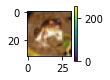

In [0]:
plt.figure(figsize=(1,1))
# plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()


This is a frog.

In [0]:
print(class_names[train_labels[0]])

Frog


We scale these values to a range of 0 to 1 before feeding them to the neural network model. To do so, we divide the values by 255. It's important that the *training set* and the *testing set* be preprocessed in the same way:

In [0]:
train_images = train_images / 255.0

test_images = test_images / 255.0

To verify that the data is in the correct format and that we're ready to build and train the network, let's display the first 25 images from the *training set* and display the class name below each image.

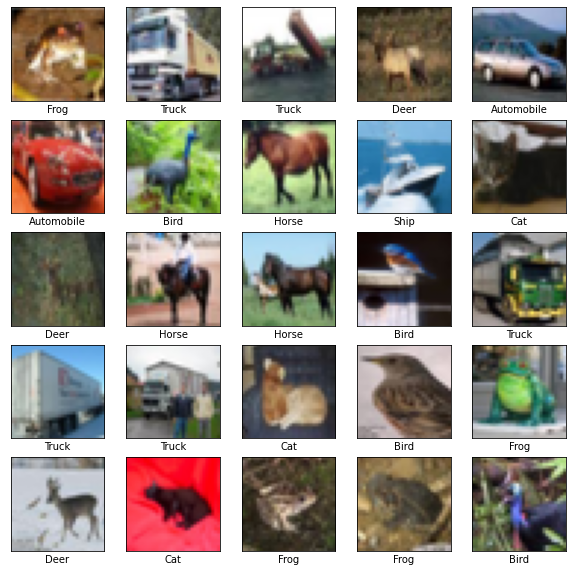

In [0]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## Build the model

Building the neural network requires configuring the layers of the model, then compiling the model.

### Set up the layers

The basic building block of a neural network is the *layer*. Layers extract representations from the data fed into them. Hopefully, these representations are meaningful for the problem at hand.

Most of deep learning consists of chaining together simple layers. Most layers, such as `tf.keras.layers.Dense`, have parameters that are learned during training.

In [0]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32, 32, 3)),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

The first layer in this network, `tf.keras.layers.Flatten`, transforms the format of the images from a two-dimensional array (of 32 by 32 pixels) to a one-dimensional array (of 32 * 32 = 1024 pixels). Think of this layer as unstacking rows of pixels in the image and lining them up. This layer has no parameters to learn; it only reformats the data.

After the pixels are flattened, the network consists of a sequence of four `tf.keras.layers.Dense` layers. These are densely connected, or fully connected, neural layers. The first `Dense` layer has 512 nodes (or neurons). The second  layer has 256 nodes, third layer has 128 nodes and fourth (and last) layer is a 10-node *softmax* layer that returns an array of 10 probability scores that sum to 1. Each node contains a score that indicates the probability that the current image belongs to one of the 10 classes.

### Compile the model

Before the model is ready for training, it needs a few more settings. These are added during the model's *compile* step:

* *Loss function* —This measures how accurate the model is during training. We want to minimize this function to "steer" the model in the right direction.
* *Optimizer* —This is how the model is updated based on the data it sees and its loss function.
* *Metrics* —Used to monitor the training and testing steps. The following example uses *accuracy*, the fraction of the images that are correctly classified.

In [0]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## Train the model

Training the neural network model requires the following steps:

1. Feed the training data to the model. In this example, the training data is in the `train_images` and `train_labels` arrays.
2. The model learns to associate images and labels.
3. We ask the model to make predictions about a test set — in this example, the `test_images` array. We verify that the predictions match the labels from the `test_labels` array.

To start training,  call the `model.fit` method — so-called because it "fits" the model to the training data:

In [0]:
history = model.fit(train_images, train_labels, validation_split = 0.3, epochs=50)

Train on 35000 samples, validate on 15000 samples
Epoch 1/50
35000/35000 [==============================] - 16s 457us/sample - loss: 1.9159 - accuracy: 0.3022 - val_loss: 1.7633 - val_accuracy: 0.3619
Epoch 2/50
35000/35000 [==============================] - 16s 457us/sample - loss: 1.7163 - accuracy: 0.3804 - val_loss: 1.6927 - val_accuracy: 0.3880
Epoch 3/50
35000/35000 [==============================] - 16s 456us/sample - loss: 1.6418 - accuracy: 0.4073 - val_loss: 1.6233 - val_accuracy: 0.4180
Epoch 4/50
35000/35000 [==============================] - 16s 450us/sample - loss: 1.5838 - accuracy: 0.4304 - val_loss: 1.6041 - val_accuracy: 0.4221
Epoch 5/50
35000/35000 [==============================] - 16s 453us/sample - loss: 1.5368 - accuracy: 0.4480 - val_loss: 1.5710 - val_accuracy: 0.4369
Epoch 6/50
35000/35000 [==============================] - 16s 466us/sample - loss: 1.5040 - accuracy: 0.4611 - val_loss: 1.5345 - val_accuracy: 0.4525
Epoch 7/50
35000/35000 [====================

As the model trains, the loss and accuracy metrics are displayed. This model reaches an accuracy of about 0.88 (or 88%) on the training data.

## Evaluate accuracy

Next, compare how the model performs on the test dataset:

In [0]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('\nTest accuracy:', test_acc)

10000/10000 [==============================] - 1s 144us/sample - loss: 2.1011 - accuracy: 0.4670

Test accuracy: 0.467


In [0]:
# list all data in history
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


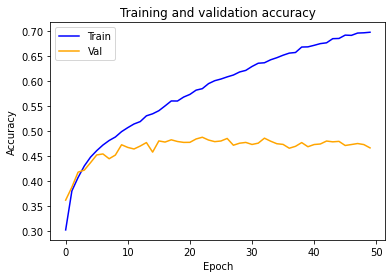

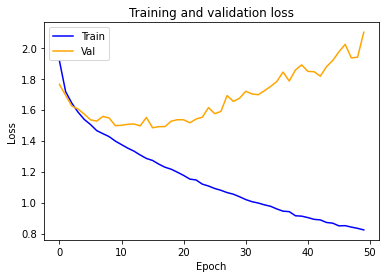

In [0]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

# Get the number of epochs
epochs = range(len(acc))

plt.title('Training and validation accuracy')
plt.plot(epochs, acc, color='blue', label='Train')
plt.plot(epochs, val_acc, color='orange', label='Val')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

_ = plt.figure()
plt.title('Training and validation loss')
plt.plot(epochs, loss, color='blue', label='Train')
plt.plot(epochs, val_loss, color='orange', label='Val')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

It turns out that the accuracy on the test dataset is a little less than the accuracy on the training dataset. This gap between training accuracy and test accuracy represents *overfitting*. Overfitting is when a machine learning model performs worse on new, previously unseen inputs than on the training data.

## Make predictions

With the model trained, we can use it to make predictions about some images.

In [0]:
predictions = model.predict(test_images)

Here, the model has predicted the label for each image in the testing set. Let's take a look at the first prediction:

In [0]:
predictions[0]

array([2.9101600e-03, 3.1580061e-03, 1.5589612e-02, 3.7674010e-02,
       8.2724893e-01, 3.5573050e-02, 9.9154619e-05, 4.0480150e-03,
       7.1695395e-02, 2.0035869e-03], dtype=float32)

A prediction is an array of 10 Labels (categories). They represent the model's "confidence" that the image corresponds to each of the classes. We can see which label has the highest confidence value:

In [0]:
class_names[np.argmax(predictions[0])]


'Deer'

The label of the element is below. Is the classification correct or not ? 

In [0]:
test_labels = test_labels.flatten()
class_names[test_labels[0]]

'Cat'

We can graph this to look at the full set of 10 class predictions.

In [0]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

Let's look at the 0th image, predictions, and prediction array.

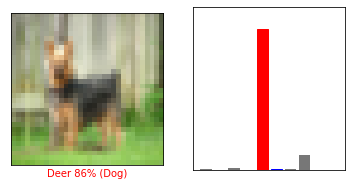

In [0]:
#i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

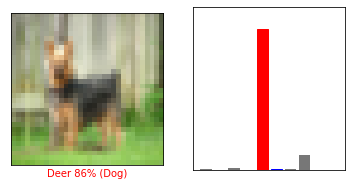

In [0]:
#i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

Let's plot several images with their predictions. Correct prediction labels are blue and incorrect prediction labels are red. The number gives the percentage (out of 100) for the predicted label. Note that the model can be wrong even when very confident.

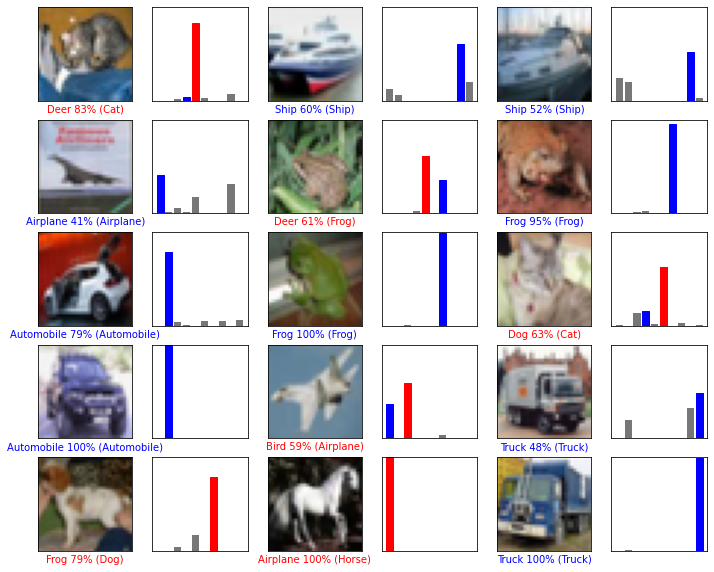

In [0]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()

Finally, use the trained model to make a prediction about a single image.

In [0]:
# Grab an image from the test dataset.
img = test_images[0]

print(img.shape)

(32, 32, 3)


`tf.keras` models are optimized to make predictions on a *batch*, or collection, of examples at once. Accordingly, even though we're using a single image, we need to add it to a list:

In [0]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 32, 32, 3)


Now predict the correct label for this image:

In [0]:
predictions_single = model.predict(img)

print(predictions_single)

[[2.9101509e-03 3.1580005e-03 1.5589578e-02 3.7674073e-02 8.2724911e-01
  3.5573110e-02 9.9154073e-05 4.0480173e-03 7.1695238e-02 2.0035910e-03]]


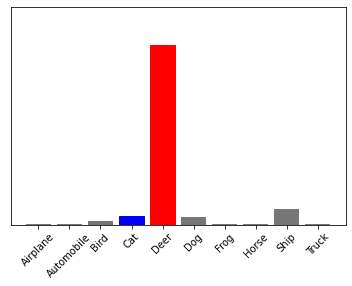

In [0]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

`model.predict` returns a list of lists—one list for each image in the batch of data. Grab the predictions for our (only) image in the batch:

In [0]:
np.argmax(predictions_single[0])

4

And, as before, the model predicts a label of 9.